In [1]:
import zeus21
from matplotlib import pyplot as plt
import numpy as np
import scipy
from scipy.interpolate import interp1d,InterpolatedUnivariateSpline
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines
#set up the CLASS cosmology
from classy import Class
ClassCosmo = Class()
ClassCosmo.compute()

import hmf
from hmf import MassFunction, Transfer   

import sys
sys.path.append('../21cm_ETHOS/21cmFAST-ethos-analysis-main/')
import sheth_tormen as st

from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import Planck15 as P15
from astropy import constants as const
import astropy.units as u

In [2]:
#Cosmology

omega_cdm = 0.12#0.1411027587
CosmoParams_input = zeus21.Cosmo_Parameters_Input(omegac = omega_cdm)
ClassyCosmo = zeus21.runclass(CosmoParams_input)
parcos = zeus21.Cosmo_Parameters(CosmoParams_input,ClassyCosmo)
corrf = zeus21.Correlations(parcos,ClassyCosmo)
hmfint = zeus21.HMF_interpolator(parcos,ClassyCosmo)

#Astrophysics

eps_star = 0.15
parastro = zeus21.Astro_Parameters(parcos, epsstar=eps_star)

#Temperature

T21_coeff = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint, zmin=12) 

In [3]:
#21 cm power spectrum

powerspec21 = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff, RSD_MODE=1)
klist = powerspec21.klist_PS
zlist = T21_coeff.zintegral


(10.0, 25.0)

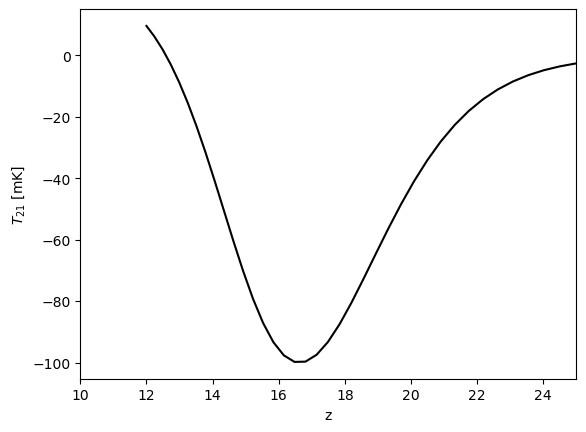

In [4]:
plt.plot(zlist,T21_coeff.T21avg, 'k')
plt.xlabel(r'z');
plt.ylabel(r'$T_{21}$ [mK]');
plt.xlim([10, 25])


In [5]:
powerspec21.klist_PS

array([4.04136295e-04, 4.87969699e-04, 5.89193375e-04, 7.11414732e-04,
       8.58989498e-04, 1.03717694e-03, 1.25232732e-03, 1.51210815e-03,
       1.82577751e-03, 2.20451396e-03, 2.66181491e-03, 3.21397765e-03,
       3.88068018e-03, 4.68568245e-03, 5.65767313e-03, 6.83129204e-03,
       8.24836464e-03, 9.95939258e-03, 1.20253535e-02, 1.45198741e-02,
       1.75318542e-02, 2.11686348e-02, 2.55598235e-02, 3.08619136e-02,
       3.72638609e-02, 4.49938183e-02, 5.43272660e-02, 6.55968296e-02,
       7.92041340e-02, 9.56341164e-02, 1.15472309e-01, 1.39425705e-01,
       1.68347956e-01, 2.03269795e-01, 2.45435765e-01, 2.96348578e-01,
       3.57822667e-01, 4.32048844e-01, 5.21672385e-01, 6.29887293e-01,
       7.60550134e-01, 9.18317471e-01, 1.10881182e+00, 1.33882202e+00,
       1.61654518e+00])

In [6]:
powerspec21 = zeus21.Power_Spectra(parcos, ClassCosmo, corrf, T21_coeff, RSD_MODE=1)
klist = powerspec21.klist_PS
zlist = T21_coeff.zintegral

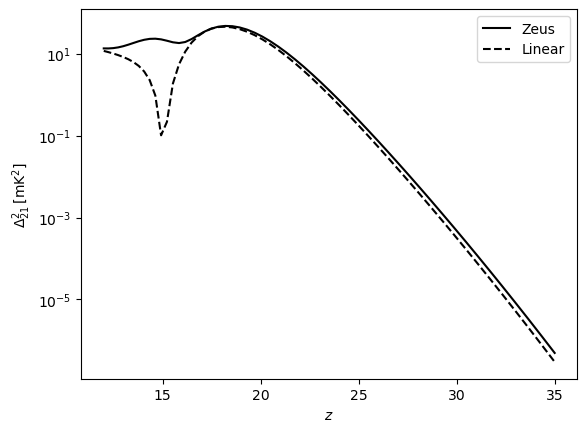

In [7]:
fig, ax = plt.subplots()  

kchoose=0.2;
_ik = min(range(len(klist)), key=lambda i: np.abs(klist[i]-kchoose))

ax.plot(zlist, powerspec21.Deltasq_T21[:,_ik],'k',label='Zeus')
ax.plot(zlist, powerspec21.Deltasq_T21_lin[:,_ik],'k--',label='Linear')
plt.yscale('log')


plt.xlabel(r'$z$');
plt.ylabel(r'$\Delta^2_{21}\,\rm[mK^2]$');
plt.legend()


#plt.ylim([1,4e2])
#plt.xlim([12, 35])

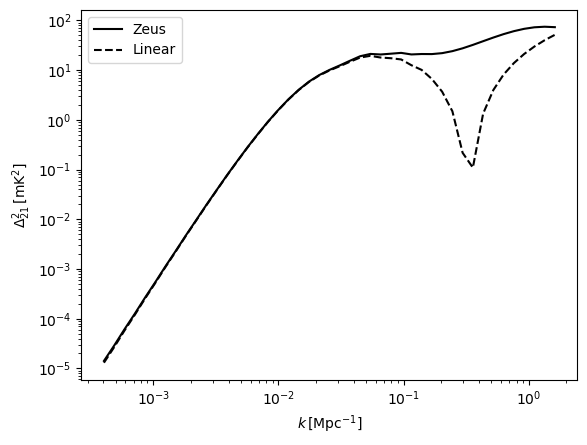

In [8]:
fig2, ax2 = plt.subplots()  

zchoose=14.;
_iz = min(range(len(zlist)), key=lambda i: np.abs(zlist[i]-zchoose))

ax2.plot(klist, powerspec21.Deltasq_T21[_iz],'k',label='Zeus')
ax2.plot(klist, powerspec21.Deltasq_T21_lin[_iz],'k--',label='Linear')

plt.xscale('log')
plt.yscale('log')

plt.legend()


plt.xlabel(r'$k\,\rm [Mpc^{-1}]$');
plt.ylabel(r'$\Delta^2_{21}\,\rm[mK^2]$');

#plt.ylim([3e-3,1e2])


In [9]:
zlist

array([12.        , 12.24024923, 12.48530844, 12.73527392, 12.9902439 ,
       13.25031857, 13.51560014, 13.78619285, 14.06220304, 14.34373916,
       14.63091186, 14.92383397, 15.2226206 , 15.52738918, 15.83825945,
       16.15535359, 16.4787962 , 16.80871437, 17.14523776, 17.48849861,
       17.83863181, 18.19577494, 18.56006835, 18.9316552 , 19.3106815 ,
       19.6972962 , 20.09165122, 20.49390153, 20.90420521, 21.32272347,
       21.7496208 , 22.18506494, 22.62922701, 23.08228154, 23.54440657,
       24.0157837 , 24.49659817, 24.98703891, 25.48729865, 25.99757397,
       26.5180654 , 27.04897747, 27.59051881, 28.14290222, 28.70634477,
       29.28106787, 29.86729738, 30.46526365, 31.07520166, 31.6973511 ,
       32.33195646, 32.97926709, 33.63953739, 34.31302681, 35.        ])

In [10]:
zchoose=10
_iz = min(range(len(zlist)), key=lambda i: np.abs(zlist[i]-zchoose))

(1e-18, 0.0001)

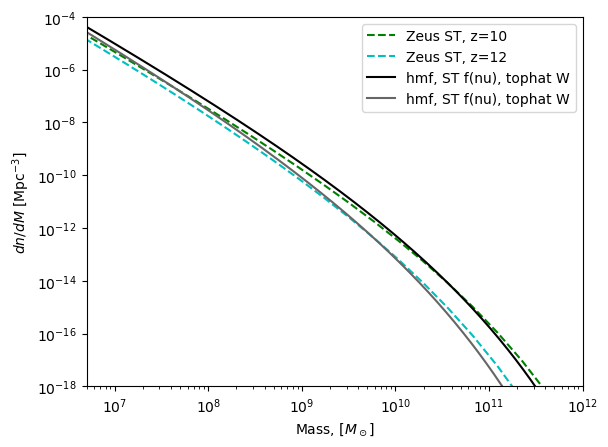

In [11]:
#True HMF
mf_z12 = MassFunction(hmf_model='ST', z=12, Mmin=6, Mmax=12,transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
mf_z10 = MassFunction(hmf_model='ST', z=10, Mmin=6, Mmax=12, transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
fig4, ax4 = plt.subplots()

ax4.plot(hmfint.Mhtab,hmfint.HMFtab[:,13],'g--',label='Zeus ST, z=10') 
ax4.plot(hmfint.Mhtab,hmfint.HMFtab[:,17],'c--',label='Zeus ST, z=12') 

plt.xscale('log')
plt.yscale('log')
ax4.plot(mf_z10.m, mf_z10.dndm, 'k-', label='hmf, ST f(nu), tophat W')
# hmf
ax4.plot(mf_z12.m, mf_z12.dndm, c='0.4', label='hmf, ST f(nu), tophat W')

ax4.legend()
plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]");

plt.xlim([5*1e6, 1e12])
plt.ylim([1e-18,1e-4])


In [12]:

hmf_P15   = st.HMF(cosmo=P15, logk=False, window_function = 'TopHat' ,f_params='ST') #same as zeus f_parsm 

Om0=0.3075, Odm0=0.2589, h=0.6774, rho_mean=8.534251e+10
Using TopHat window function
Using ST f(sigma) params


In [13]:
#h = 0.675
#Pk_LCDM_file = "newLy-a_cdm_sim_model_matterpower.daw"
#hmf_P15   = st.HMF(cosmo=P15, use_hmf=True)
#cosmoSw = FlatLambdaCDM(H0=100*h, Om0=(0.1201075+0.0223828)/h**2., Ob0=0.0223828/h**2.)

#st_P15   = st.HMF(cosmo=P15, use_hmf=False, logk=True, N_k=1000)

#eth = zeus21.ETHOS(parcos, ClassyCosmo, corrf, cosmo=P15,d logk=False, window_function = 'TopHat' ,f_params='ST')
eth = zeus21.ETHOS(parcos, ClassyCosmo, cosmo=P15, logk=False, window_function = 'TopHat' ,f_params='ST')

mf_z12 = MassFunction(hmf_model='ST', z=12, Mmin=7, Mmax=12)
mf_z10 = MassFunction(hmf_model='ST', z=10, Mmin=7, Mmax=12)



# Sheth Tormen, tophat
#hmf_P15.window_function = 'TopHat'
#hmf_P15.f_params = 'ST'

#True HMF


Mhmin = 1e5
Mhmax = 1e14
MM = np.logspace(np.log10(Mhmin),np.log10(Mhmax),35)

hmfz12 = zeus21.ST_HMF(parcos,hmfint.Mhtab,hmfint.sigmaMhtab[:,17],hmfint.dsigmadMMhtab[:,17])

hmfz10 = zeus21.ST_HMF(parcos,hmfint.Mhtab,hmfint.sigmaMhtab[:,13],hmfint.dsigmadMMhtab[:,13])
mf_z10


(1e-13, 1000.0)

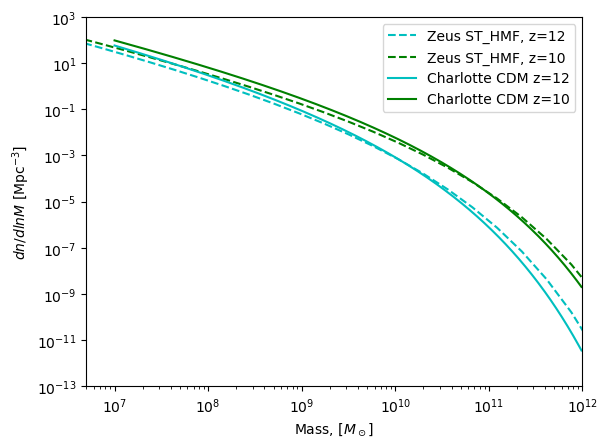

In [14]:
fig5, ax5 = plt.subplots()
#hmf
#ax5.plot(mf_z5.m, mf_z5.dndm, '--', label='hmf, z=12')
ax5.plot(hmfint.Mhtab,hmfint.Mhtab*hmfz12,'c--',label='Zeus ST_HMF, z=12')
#ax5.plot(mf_z10.m, mf_z10.dndm, '-', label='hmf, z=10')
ax5.plot(hmfint.Mhtab,hmfint.Mhtab*hmfz10,'g--',label='Zeus ST_HMF, z=10')

ax5.plot(mf_z12.m, hmf_P15.dN_dlnM(mf_z12.m, z=12, h_peak=0., k_peak=0., LCDM=True), 
          'c-', label='Charlotte CDM z=12') 
ax5.plot(mf_z10.m, hmf_P15.dN_dlnM(mf_z10.m, z=10, h_peak=0., k_peak=0., LCDM=True), 
          'g-', label='Charlotte CDM z=10') 



plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/dln{M}$ [Mpc$^{-3}$]")
#plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")

plt.xlim([5*1e6, 1e12])
plt.ylim([1e-13,1e3])
#plt.xlim([1e8, 1e10])
#plt.ylim([1e-12,1e-6])

(1e-13, 1000.0)

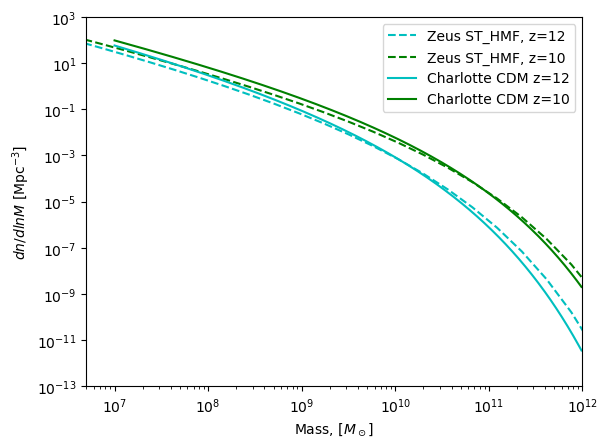

In [15]:
fig5, ax5 = plt.subplots()

mf_z12 = MassFunction(hmf_model='ST', z=12, Mmin=7, Mmax=12,transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
mf_z10 = MassFunction(hmf_model='ST', z=10, Mmin=7, Mmax=12, transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)

# hmf

ax5.plot(hmfint.Mhtab,hmfint.Mhtab*hmfint.HMFtab[:,17],'c--',label='Zeus ST_HMF, z=12')

ax5.plot(hmfint.Mhtab,hmfint.Mhtab*hmfint.HMFtab[:,13],'g--',label='Zeus ST_HMF, z=10')

ax5.plot(mf_z12.m, hmf_P15.dN_dlnM(mf_z12.m, z=12, h_peak=0., k_peak=0., LCDM=True), 
          'c-', label='Charlotte CDM z=12') 
ax5.plot(mf_z10.m, hmf_P15.dN_dlnM(mf_z10.m, z=10, h_peak=0., k_peak=0., LCDM=True), 
          'g-', label='Charlotte CDM z=10') 


plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/dln{M}$ [Mpc$^{-3}$]")
#plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")

plt.xlim([5*1e6, 1e12])
plt.ylim([1e-13,1e3])
#plt.xlim([1e8, 1e10])
#plt.ylim([1e-12,1e-6])

In [16]:
sigma_12 = np.sqrt(hmf_P15.sigma2_M(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac_simple(12)
sigma_10= np.sqrt(hmf_P15.sigma2_M(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac_simple(10)
sigma_12_eth = np.sqrt(eth.sigma2_M(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac_simple(12)
sigma_10_eth = np.sqrt(eth.sigma2_M(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac_simple(10)
sigma = np.sqrt(hmf_P15.sigma2_M(hmfint.Mhtab, LCDM=True))
sigma_eth = np.sqrt(eth.sigma2_M(hmfint.Mhtab, LCDM=True))
dsigma2_12 = (hmf_P15.dsigma2_dM(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac(12)
dsigma2_10= (hmf_P15.dsigma2_dM(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac(10)
dsigma2_12_eth = (eth.dsigma2_dM(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac(12)
dsigma2_10_eth = (eth.dsigma2_dM(hmfint.Mhtab, LCDM=True))*hmf_P15.growth_fac(10)


In [17]:
hmf_P15.sigma2_M(MM, LCDM=True)

array([83.89943231, 78.09091689, 72.56662492, 67.31768433, 62.3347117 ,
       57.60743825, 53.12514281, 48.87705422, 44.85342544, 41.04691085,
       37.45326336, 34.06991622, 30.89328124, 27.91850717, 25.14059947,
       22.55406172, 20.15311524, 17.93169481, 15.88350359, 14.00203109,
       12.28055211, 10.71211779,  9.28957241,  8.00560156,  6.85278594,
        5.82365495,  4.91072158,  4.10653374,  3.40360593,  2.79420353,
        2.27039937,  1.82445771,  1.44878157,  1.1353915 ,  0.87490819])

In [18]:
eth.sigma2_M(MM, LCDM=True)

array([83.89943231, 78.09091689, 72.56662492, 67.31768433, 62.3347117 ,
       57.60743825, 53.12514281, 48.87705422, 44.85342544, 41.04691085,
       37.45326336, 34.06991622, 30.89328124, 27.91850717, 25.14059947,
       22.55406172, 20.15311524, 17.93169481, 15.88350359, 14.00203109,
       12.28055211, 10.71211779,  9.28957241,  8.00560156,  6.85278594,
        5.82365495,  4.91072158,  4.10653374,  3.40360593,  2.79420353,
        2.27039937,  1.82445771,  1.44878157,  1.1353915 ,  0.87490819])

Text(0, 0.5, '$\\sigma$')

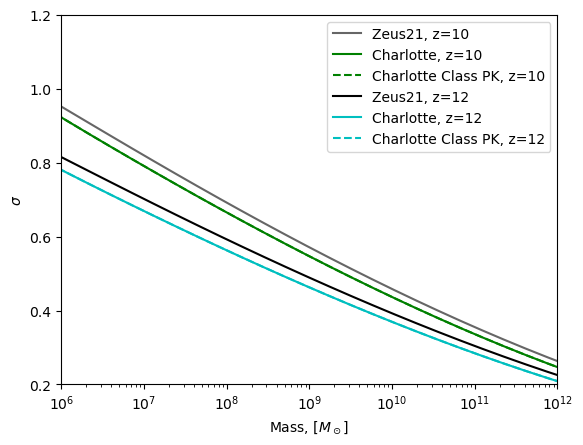

In [19]:
fig7, ax7 = plt.subplots()

ax7.plot(hmfint.Mhtab,hmfint.sigmaMhtab[:,13],c='0.4',label='Zeus21, z=10' ) 
ax7.plot(hmfint.Mhtab,sigma_10,'g-',label='Charlotte, z=10' ) 
ax7.plot(hmfint.Mhtab,sigma_10_eth,'g--',label='Charlotte Class PK, z=10' ) 
ax7.plot(hmfint.Mhtab,hmfint.sigmaMhtab[:,17],'k-',label='Zeus21, z=12' ) 
ax7.plot(hmfint.Mhtab,sigma_12,'c-',label='Charlotte, z=12' ) 
ax7.plot(hmfint.Mhtab,sigma_12_eth,'c--',label='Charlotte Class PK, z=12' ) 
#ax7.plot(mf_z12.m, mf_z12.sigma, c='0.4', label='hmf z=12')
#ax7.plot(mf_z10.m, mf_z10.sigma, 'k-', label='hmf z=10')
plt.xscale('log')
#plt.yscale('log')

plt.legend()

plt.xlim(1e6,1e12)
plt.ylim(0.2,1.2)
plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$\sigma$") 

Text(0, 0.5, '$\\sigma$')

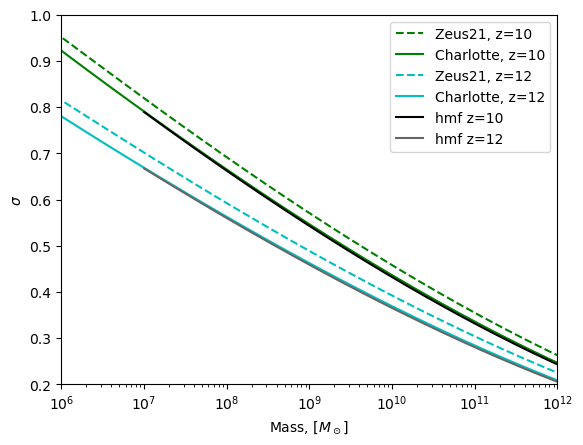

In [20]:
fig7, ax7 = plt.subplots()

ax7.plot(hmfint.Mhtab,hmfint.sigmaMhtab[:,13],'g--',label='Zeus21, z=10' ) 
ax7.plot(hmfint.Mhtab,sigma_10,'g-',label='Charlotte, z=10' ) 
ax7.plot(hmfint.Mhtab,hmfint.sigmaMhtab[:,17],'c--',label='Zeus21, z=12' ) 
ax7.plot(hmfint.Mhtab,sigma_12,'c-',label='Charlotte, z=12' ) 
ax7.plot(mf_z10.m, mf_z10.sigma, 'k-', label='hmf z=10')
ax7.plot(mf_z12.m, mf_z12.sigma, c='0.4', label='hmf z=12')

plt.xscale('log')
#plt.yscale('log')

plt.legend()

plt.xlim(1e6,1e12)
plt.ylim(0.2,1)
plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$\sigma$")

sigma_t

(1e-22, 0.001)

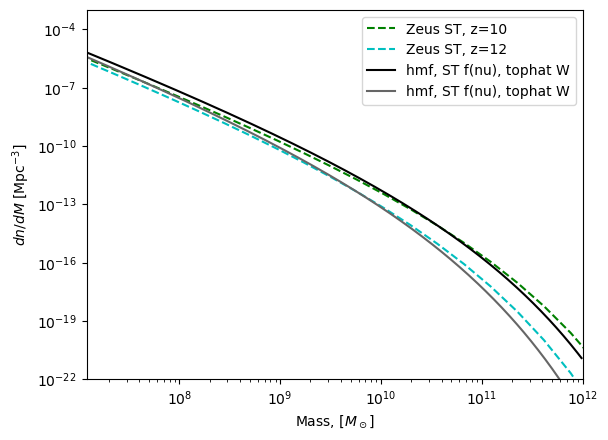

In [21]:
fig5, ax5 = plt.subplots()



mf_z12 = MassFunction(hmf_model='ST', z=12, Mmin=7, Mmax=12,transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
mf_z10 = MassFunction(hmf_model='ST', z=10, Mmin=7, Mmax=12, transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)

# hmf
#ax5.plot(mf_z5.m, mf_z5.dndm, '--', label='hmf, z=12')
ax5.plot(hmfint.Mhtab,hmfint.HMFtab[:,13],'g--',label='Zeus ST, z=10') 
ax5.plot(hmfint.Mhtab,hmfint.HMFtab[:,17],'c--',label='Zeus ST, z=12') 
#ax5.plot(mf_z10.m, mf_z10.dndm, '-', label='hmf, z=10')

ax5.plot(mf_z10.m, mf_z10.dndm, 'k-', label='hmf, ST f(nu), tophat W')
# hmf
ax5.plot(mf_z12.m, mf_z12.dndm, c='0.4', label='hmf, ST f(nu), tophat W')


plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")
#plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")

plt.xlim([12*1e6, 1e12])
plt.ylim([1e-22,1e-3])

Om0=0.3075, Odm0=0.2589, h=0.6774, rho_mean=8.534251e+10
Using Bohr window function
Using Schneider13 f(sigma) params


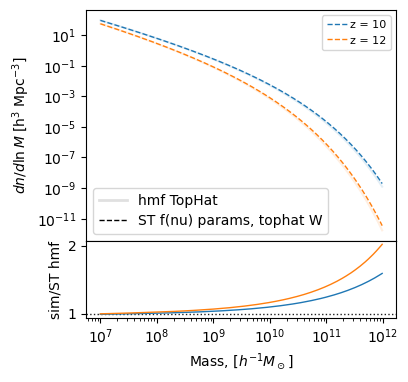

In [22]:
Pk_LCDM_file = "newLy-a_cdm_sim_model_matterpower.dat"

h = 0.675
cosmoSB = FlatLambdaCDM(H0=100*h, Om0=(0.1193+0.02226)/h**2., Ob0=0.02226/h**2.)

st_P15   = st.HMF(cosmo=P15, use_hmf=False, logk=True, N_k=1000, f_params='Schneider13')


LCDM = True
z    = 0
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(4,4), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

for z in [10, 12]:
    # hmf
    mf_z = MassFunction(hmf_model='ST', z=z, Mmin=7, Mmax=12, 
                        transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
    ln = ax1.loglog(mf_z.m, mf_z.dndlnm, alpha=0.12)

    # Tophat W(k)
    st_P15.f_params = 'ST'
    st_P15.window_function = 'TopHat'
    hmf_tophat = st_P15.dN_dlnM(mf_z.m, z=z, h_peak=0., k_peak=0., LCDM=LCDM)

    ax1.plot(mf_z.m, hmf_tophat, lw=1, c=ln[0].get_color(), ls='dashed', label=f'z = {z}')
    ax2.plot(mf_z.m, hmf_tophat/mf_z.dndlnm, lw=1, c=ln[0].get_color())

line_hmf    = mlines.Line2D([], [], ls='solid', lw=2, alpha=0.12, c='k', label='hmf TopHat')
line_tophat = mlines.Line2D([], [], ls='dashed', lw=1, c='k', label='ST f(nu) params, tophat W')
leg = ax1.legend(handles=[line_hmf, line_tophat], loc='lower left')
ax1.add_artist(leg)

ax1.legend(loc='upper right', fontsize=8, handletextpad=0.1)
ax2.axhline(1, c='0.12', lw=1, ls='dotted', zorder=0)

ax1.set_xscale('log')
ax1.set_yscale('log')
# ax2.set_ylim(0,10)
# ax1.set_ylim(1e-3,1e3)


fig.subplots_adjust(hspace=0)
plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
ax1.set_ylabel(r"$dn/d\ln{M}$ [h$^{3}$ Mpc$^{-3}$]");
ax2.set_ylabel('sim/ST hmf');



Om0=0.3075, Odm0=0.2589, h=0.6774, rho_mean=8.534251e+10
Using Bohr window function
Using ST f(sigma) params


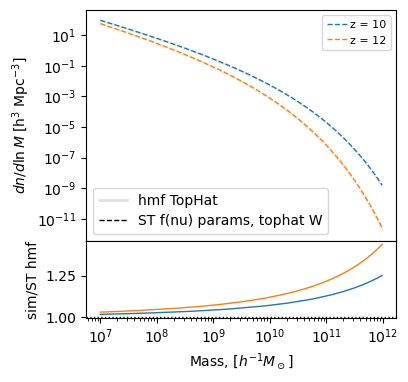

In [23]:
Pk_LCDM_file = "newLy-a_cdm_sim_model_matterpower.dat"

h = 0.675
cosmoSB = FlatLambdaCDM(H0=100*h, Om0=(0.1193+0.02226)/h**2., Ob0=0.02226/h**2.)

st_P15   = st.HMF(cosmo=P15, use_hmf=True, logk=True, N_k=1000, f_params='ST')


LCDM = True
z    = 0
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(4,4), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

for z in [10, 12]:
    # hmf
    mf_z = MassFunction(hmf_model='ST', z=z, Mmin=7, Mmax=12, 
                        transfer_model='EH', filter_model=hmf.density_field.filters.TopHat)
    ln = ax1.loglog(mf_z.m, mf_z.dndlnm, alpha=0.12)

    # Tophat W(k)
    st_P15.f_params = 'ST'
    st_P15.window_function = 'TopHat'
    hmf_tophat = st_P15.dN_dlnM(mf_z.m, z=z, h_peak=0., k_peak=0., LCDM=LCDM)

    ax1.plot(mf_z.m, hmf_tophat, lw=1, c=ln[0].get_color(), ls='dashed', label=f'z = {z}')
    ax2.plot(mf_z.m, hmf_tophat/mf_z.dndlnm, lw=1, c=ln[0].get_color())

line_hmf    = mlines.Line2D([], [], ls='solid', lw=2, alpha=0.12, c='k', label='hmf TopHat')
line_tophat = mlines.Line2D([], [], ls='dashed', lw=1, c='k', label='ST f(nu) params, tophat W')
leg = ax1.legend(handles=[line_hmf, line_tophat], loc='lower left')
ax1.add_artist(leg)

ax1.legend(loc='upper right', fontsize=8, handletextpad=0.1)
ax2.axhline(1, c='0.12', lw=1, ls='dotted', zorder=0)

ax1.set_xscale('log')
ax1.set_yscale('log')
# ax2.set_ylim(0,10)
# ax1.set_ylim(1e-3,1e3)


fig.subplots_adjust(hspace=0)
plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
ax1.set_ylabel(r"$dn/d\ln{M}$ [h$^{3}$ Mpc$^{-3}$]");
ax2.set_ylabel('sim/ST hmf');



Om0=0.3075, Odm0=0.2589, h=0.6774, rho_mean=8.534251e+10
Using Bohr window function
Using ST f(sigma) params


(1e-14, 1000.0)

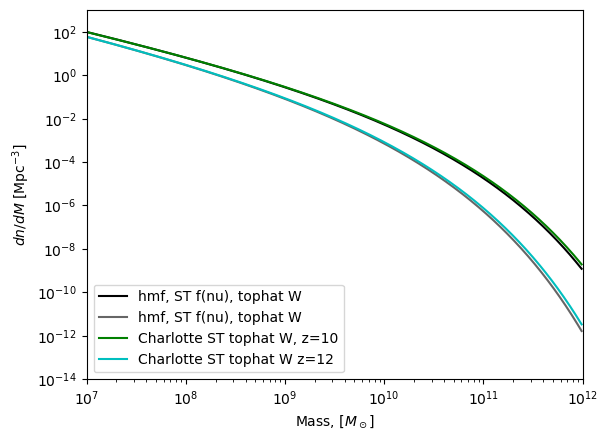

In [24]:
fig6, ax6 = plt.subplots()
Pk_LCDM_file = "newLy-a_cdm_sim_model_matterpower.dat"

h = 0.675
cosmoSB = FlatLambdaCDM(H0=100*h, Om0=(0.1193+0.02226)/h**2., Ob0=0.02226/h**2.)

st_P15   = st.HMF(cosmo=P15, use_hmf=False, logk=True, N_k=1000, f_params='ST')
st_P15.f_params = 'ST'
st_P15.window_function = 'TopHat'
hmf_eth_tophat10 = st_P15.dN_dlnM(mf_z10.m, z=10, h_peak=0., k_peak=0., LCDM=LCDM)
hmf_eth_tophat12 = st_P15.dN_dlnM(mf_z10.m, z=12, h_peak=0., k_peak=0., LCDM=LCDM)
# hmf

ax6.plot(mf_z10.m, mf_z10.dndlnm, 'k-', label='hmf, ST f(nu), tophat W')
# hmf
ax6.plot(mf_z12.m, mf_z12.dndlnm, c='0.4', label='hmf, ST f(nu), tophat W')
ax6.plot(mf_z10.m, hmf_eth_tophat10, 'g-', label='Charlotte ST tophat W, z=10')
ax6.plot(mf_z10.m, hmf_eth_tophat12, 'c-', label='Charlotte ST tophat W z=12')




plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")
#plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")

plt.xlim(1e7, 1e12)
plt.ylim(1e-14,1e3)

Om0=0.3075, Odm0=0.2589, h=0.6774, rho_mean=8.534251e+10
Using Bohr window function
Using ST f(sigma) params


AttributeError: 'ETHOS' object has no attribute 'dN_dlnM'

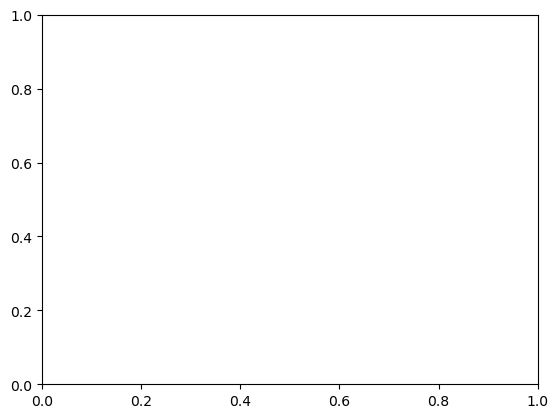

In [25]:
fig7, ax7 = plt.subplots()
Pk_LCDM_file = "newLy-a_cdm_sim_model_matterpower.dat"

h = 0.675
cosmoSB = FlatLambdaCDM(H0=100*h, Om0=(0.1193+0.02226)/h**2., Ob0=0.02226/h**2.)

st_P15   = st.HMF(cosmo=P15, use_hmf=False, logk=True, N_k=1000, f_params='ST')
st_P15.f_params = 'ST'
st_P15.window_function = 'TopHat'
hmf_eth_tophat10 = st_P15.dN_dlnM(mf_z10.m, z=10, h_peak=0., k_peak=0., LCDM=LCDM)
hmf_eth_tophat12 = st_P15.dN_dlnM(mf_z12.m, z=12, h_peak=0., k_peak=0., LCDM=LCDM)
hmf_eth_tophat10_Pk = eth.dN_dlnM(mf_z10.m, z=10, h_peak=0., k_peak=0., LCDM=LCDM)
hmf_eth_tophat12_Pk = eth.dN_dlnM(mf_z12.m, z=12, h_peak=0., k_peak=0., LCDM=LCDM)

# hmf 
ax7.plot(mf_z10.m, hmf_eth_tophat10/mf_z10.m, 'g-', label='Charlotte tophat W, z=10')
ax7.plot(mf_z12.m, hmf_eth_tophat12/mf_z12.m, 'c-',label='Charlotte tophat W, z=12')
ax7.plot(hmfint.Mhtab,hmfint.HMFtab[:,13],'g--',label='Zeus ST, z=10') 
ax7.plot(hmfint.Mhtab,hmfint.HMFtab[:,17],'c--',label='Zeus ST, z=12') 
ax7.plot(mf_z10.m, mf_z10.dndm, 'k-', label='hmf, ST f(nu), tophat W, z=10')
ax7.plot(mf_z12.m, mf_z12.dndm, c='0.4', label='hmf, ST f(nu), tophat W, z=12')


plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")
#plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")

plt.xlim(1e7, 1e12)
plt.ylim(1e-18,1e-4)

(1e-15, 0.0001)

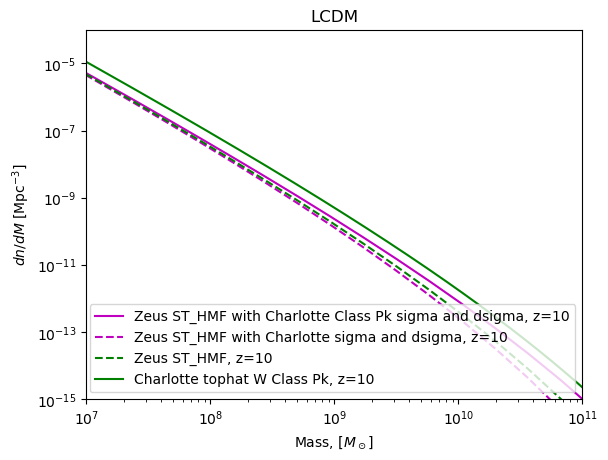

In [ ]:
fig8, ax8 = plt.subplots()


ax8.plot(hmfint.Mhtab,zeus21.ST_HMF(parcos,hmfint.Mhtab,sigma_10_eth,dsigma2_10_eth/2/sigma_eth),'m-',label='Zeus ST_HMF with Charlotte Class Pk sigma and dsigma, z=10')
ax8.plot(hmfint.Mhtab,zeus21.ST_HMF(parcos,hmfint.Mhtab,sigma_10,dsigma2_10/2/sigma),'m--',label='Zeus ST_HMF with Charlotte sigma and dsigma, z=10')
#ax8.plot(hmfint.Mhtab,zeus21.ST_HMF(parcos,hmfint.Mhtab,sigma_10,hmfint.dsigmadMMhtab[:,10]),'m--',label='Zeus ST_HMF with ethos sigma, z=10')
ax8.plot(hmfint.Mhtab,hmfint.HMFtab[:,13],'g--',label='Zeus ST_HMF, z=10')
ax8.plot(mf_z10.m, hmf_eth_tophat10_Pk/mf_z10.m, 'g-', label='Charlotte tophat W Class Pk, z=10')
#ax8.plot(mf_z10.m, mf_z10.dndm, 'k-', label='hmf, ST f(nu), tophat W, z=10')

plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")
plt.title('LCDM')

plt.xlim(1e7, 1e11)
plt.ylim(1e-15,1e-4)

In [ ]:
zeus21.ST_HMF(parcos,hmfint.Mhtab,sigma_10_eth,dsigma2_10_eth/2/sigma_eth)

array([6.14609600e-02, 1.80244162e-02, 5.26432491e-03, 1.53054546e-03,
       4.42737152e-04, 1.27355076e-04, 3.64125843e-05, 1.03429644e-05,
       2.91640214e-06, 8.14943084e-07, 2.25084373e-07, 6.12686515e-08,
       1.63896626e-08, 4.29557221e-09, 1.09911033e-09, 2.73367505e-10,
       6.57400432e-11, 1.51863105e-11, 3.34278382e-12, 6.94146420e-13,
       1.34297489e-13, 2.38330078e-14, 3.80384150e-15, 5.32458676e-16,
       6.32896631e-17, 6.12533671e-18, 4.56816794e-19, 2.44107224e-20,
       8.48922471e-22, 1.68932837e-23, 1.61406593e-25, 5.81272931e-28,
       5.66734603e-31, 9.85021834e-35, 1.93369350e-39])

(1e-15, 0.0001)

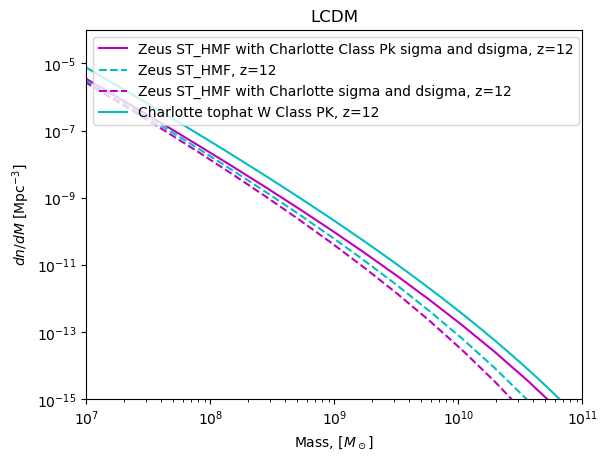

In [ ]:
fig8, ax8 = plt.subplots()


ax8.plot(hmfint.Mhtab,zeus21.ST_HMF(parcos,hmfint.Mhtab,sigma_12_eth,dsigma2_12_eth/2/sigma_eth),'m-',label='Zeus ST_HMF with Charlotte Class Pk sigma and dsigma, z=12')
#ax8.plot(hmfint.Mhtab,zeus21.ST_HMF(parcos,hmfint.Mhtab,sigma_10,hmfint.dsigmadMMhtab[:,10]),'m--',label='Zeus ST_HMF with Charlotte sigma, z=10')
ax8.plot(hmfint.Mhtab,hmfint.HMFtab[:,17],'c--',label='Zeus ST_HMF, z=12')
ax8.plot(hmfint.Mhtab,zeus21.ST_HMF(parcos,hmfint.Mhtab,sigma_12,dsigma2_12/2/sigma),'m--',label='Zeus ST_HMF with Charlotte sigma and dsigma, z=12')
#ax8.plot(mf_z12.m, hmf_eth_tophat12/mf_z12.m, 'c-', label='ETHOS tophat W, z=12')
#ax8.plot(mf_z10.m, mf_z10.dndm, 'k-', label='hmf, ST f(nu), tophat W, z=10')
ax8.plot(mf_z12.m, hmf_eth_tophat12_Pk/mf_z12.m, 'c-', label='Charlotte tophat W Class PK, z=12')

plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$dn/d{M}$ [Mpc$^{-3}$]")
plt.title('LCDM')

plt.xlim(1e7, 1e11)
plt.ylim(1e-15,1e-4)

Text(0, 0.5, '$|d\\sigma^2/dM|$')

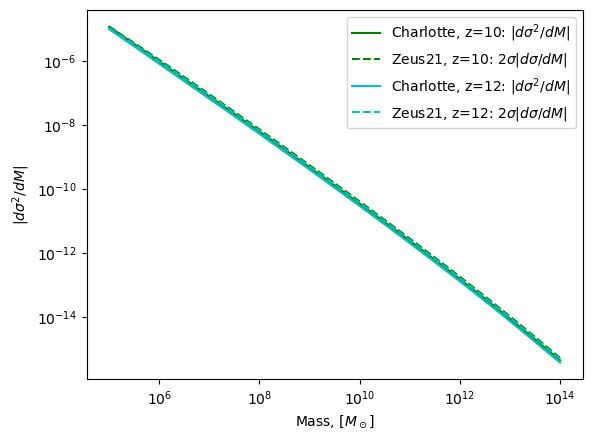

In [ ]:
fig9, ax9 = plt.subplots()

ax9.plot(hmfint.Mhtab,-dsigma2_10,'g-',label='Charlotte, z=10: $|d\sigma^2/dM|$')
ax9.plot(hmfint.Mhtab,-hmfint.dsigmadMMhtab[:,10]*2*sigma,'g--',label='Zeus21, z=10: 2$\sigma|d\sigma/dM|$' ) 
ax9.plot(hmfint.Mhtab,-dsigma2_12,'c-',label='Charlotte, z=12: $|d\sigma^2/dM|$') 
ax9.plot(hmfint.Mhtab,-hmfint.dsigmadMMhtab[:,12]*2*sigma,'c--',label='Zeus21, z=12: 2$\sigma|d\sigma/dM|$' ) 





plt.xscale('log')
plt.yscale('log')


plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$|d\sigma^2/dM|$")

Text(0, 0.5, '$|d\\sigma^2/dM|$')

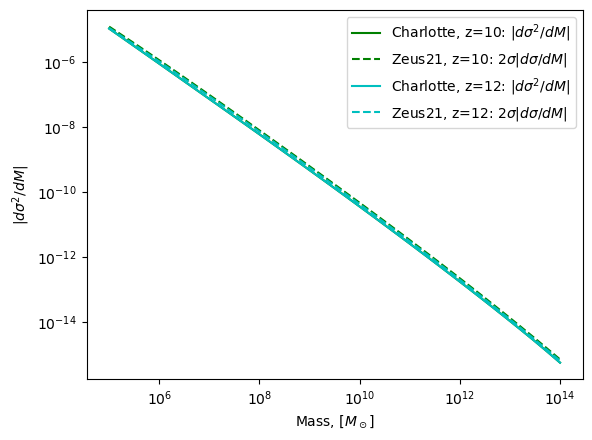

In [ ]:
fig9, ax9 = plt.subplots()

ax9.plot(hmfint.Mhtab,-dsigma2_12_eth,'g-',label='Charlotte, z=10: $|d\sigma^2/dM|$')
ax9.plot(hmfint.Mhtab,-hmfint.dsigmadMMhtab[:,10]*2*sigma_eth,'g--',label='Zeus21, z=10: 2$\sigma|d\sigma/dM|$' ) 
ax9.plot(hmfint.Mhtab,-dsigma2_12_eth,'c-',label='Charlotte, z=12: $|d\sigma^2/dM|$') 
ax9.plot(hmfint.Mhtab,-hmfint.dsigmadMMhtab[:,12]*2*sigma_eth,'c--',label='Zeus21, z=12: 2$\sigma|d\sigma/dM|$' ) 





plt.xscale('log')
plt.yscale('log')


plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$|d\sigma^2/dM|$")

(1e-13, 1e-08)

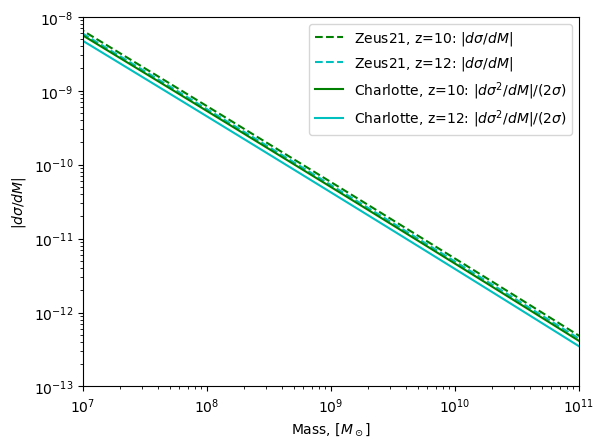

In [ ]:
fig9, ax9 = plt.subplots()




ax9.plot(hmfint.Mhtab,-hmfint.dsigmadMMhtab[:,10],'g--',label='Zeus21, z=10: $|d\sigma/dM|$' ) 
ax9.plot(hmfint.Mhtab,-hmfint.dsigmadMMhtab[:,12],'c--',label='Zeus21, z=12: $|d\sigma/dM|$' ) 
ax9.plot(hmfint.Mhtab,-dsigma2_10/2/sigma,'g-',label='Charlotte, z=10: $|d\sigma^2/dM|/(2\sigma)$') 
ax9.plot(hmfint.Mhtab,-dsigma2_12/2/sigma,'c-',label='Charlotte, z=12: $|d\sigma^2/dM|/(2\sigma)$') 

plt.xscale('log')
plt.yscale('log')


plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$|d\sigma/dM|$")

plt.xlim(1e7, 1e11)
plt.ylim(1e-13,1e-8)

Text(0, 0.5, '$|d\\sigma/dM|$')

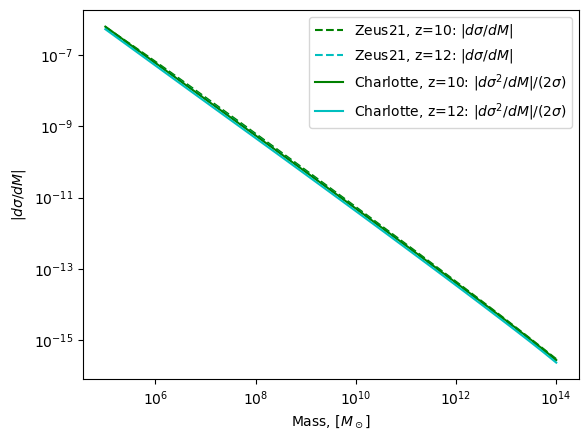

In [ ]:
fig9, ax9 = plt.subplots()




ax9.plot(hmfint.Mhtab,-hmfint.dsigmadMMhtab[:,10],'g--',label='Zeus21, z=10: $|d\sigma/dM|$' ) 
ax9.plot(hmfint.Mhtab,-hmfint.dsigmadMMhtab[:,12],'c--',label='Zeus21, z=12: $|d\sigma/dM|$' ) 
ax9.plot(hmfint.Mhtab,-dsigma2_10_eth/2/sigma_eth,'g-',label='Charlotte, z=10: $|d\sigma^2/dM|/(2\sigma)$') 
ax9.plot(hmfint.Mhtab,-dsigma2_12_eth/2/sigma_eth,'c-',label='Charlotte, z=12: $|d\sigma^2/dM|/(2\sigma)$') 

plt.xscale('log')
plt.yscale('log')


plt.legend()

plt.xlabel(r"Mass, $[M_\odot]$")
plt.ylabel(r"$|d\sigma/dM|$")


In [ ]:
T21_coeff = zeus21.get_T21_coefficients(parcos, ClassyCosmo, parastro, hmfint, zmin=12) 

In [ ]:
st.HMF.growth_fac_simple

<function sheth_tormen.st_hmf.HMF.growth_fac_simple(self, z)>

In [ ]:
zeus21.ETHOS.growth_fac

<function zeus21.cosmology.ETHOS.growth_fac(self, z)>

In [ ]:
zeus21.HMF_interpolator

zeus21.cosmology.HMF_interpolator